In [68]:
import csv
import main as utils
import copy

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps

colortab = colormaps["tab20"]

colormap = [colortab(x/20) for x in range(20)]

In [101]:
data = utils.CompleteData(utils.DATA_DIR, utils.DB_FILENAME)

all_ids = list(data.apartment_data.keys())
sizes = np.array([data.apartment_data[x].living_space for x in all_ids])
rents = np.array([data.apartment_data[x].rent for x in all_ids])

points = []

for id in all_ids:
    finals_points = list(filter(lambda x: x is not None, data.queue_data[id]))[-1][0]
    points.append(finals_points)


areas_set = {data.apartment_data[x].area for x in all_ids}
types_set = {data.apartment_data[x].type for x in all_ids}

zone_color_map = {zone: colormap[i] for (i, zone) in enumerate(areas_set)}
type_color_map = {ap_type: colormap[i] for (i, ap_type) in enumerate(types_set)}

zone_colors = [zone_color_map[data.apartment_data[x].area] for x in all_ids]
type_colors = [type_color_map[data.apartment_data[x].type] for x in all_ids]


[4446.04234093   83.94202753]


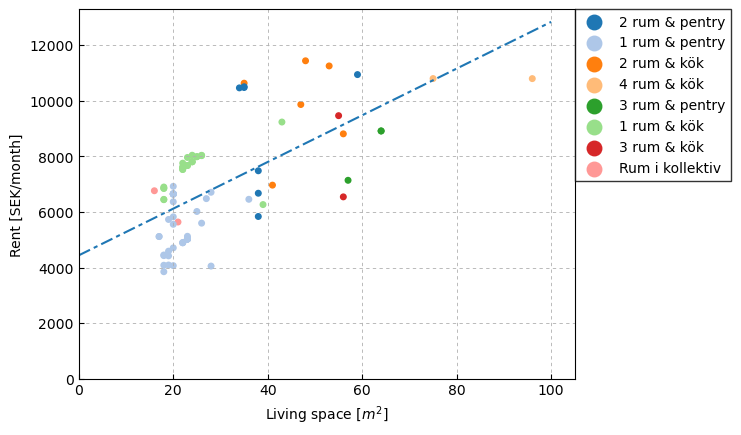

In [102]:
all_ids = list(data.apartment_data.keys())
sizes = np.array([data.apartment_data[x].living_space for x in all_ids])
rents = np.array([data.apartment_data[x].rent for x in all_ids])
zones = [data.apartment_data[x].area for x in all_ids]

all_zones = set(zones)

zone_color = {zone: colormap[i] for (i, zone) in enumerate(all_zones)}

colors = [zone_color[x] for x in zones]

x = np.linalg.lstsq(np.stack((np.ones(sizes.shape), sizes), 1), rents, rcond=None)[0]

print(x)

fig = plt.figure()
ax = fig.subplots()

base_handle = ax.scatter(sizes, rents, c=type_colors, s=16)
ax.plot([0, 100], [x[0], x[0] + 100*x[1]], dashes=(6,2,2,2))
ax.set_xlim(0, None)
ax.set_ylim(0, None)
ax.grid(dashes=(4,4), linewidth=0.6)
ax.set_xlabel("Living space [$m^2$]")
ax.set_ylabel("Rent [SEK/month]")
ax.tick_params(tickdir="in")
""

all_handles = []
all_zones = []

for (ap_type, color) in type_color_map.items():
    all_zones.append(ap_type)
    handle = copy.copy(base_handle)
    handle.set_sizes([109])
    handle.set_color(color)
    all_handles.append(handle)

ax.legend(
    all_handles,
    all_zones,
    bbox_to_anchor=(1,1),
    fancybox=False,
    borderaxespad=0,
    edgecolor="k"
)


[190.75292131  10.45340632]


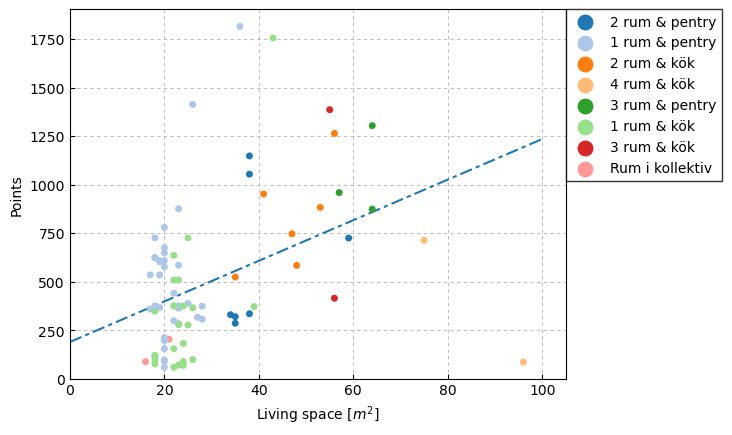

In [104]:


x = np.linalg.lstsq(np.stack((np.ones(sizes.shape), sizes), 1), points, rcond=None)[0]

print(x)

fig = plt.figure()
ax = fig.subplots()

base_handle = ax.scatter(sizes, points, c=type_colors, s=16, zorder=3)
ax.plot([0, 100], [x[0], x[0] + 100*x[1]], dashes=(6,2,2,2))
ax.set_xlim(0, None)
ax.set_ylim(0, None)
ax.grid(dashes=(4,4), linewidth=0.6)
ax.set_xlabel("Living space [$m^2$]")
ax.set_ylabel("Points")
ax.tick_params(tickdir="in")
""

all_handles = []
all_zones = []

for (zone, color) in type_color_map.items():
    all_zones.append(zone)
    handle = copy.copy(base_handle)
    handle.set_sizes([109])
    handle.set_color(color)
    all_handles.append(handle)

ax.legend(
    all_handles,
    all_zones,
    bbox_to_anchor=(1,1),
    fancybox=False,
    borderaxespad=0,
    edgecolor="k"
)
